# Exploratory Data Analysis on Kaggle's Heart Disease Dataset

In this exercise you'll learn all about exploratory data analysis (EDA) invented by the influential statistician John Tukey, who also coined the term "bit." EDA is a technique for summarizing the main features of a dataset without formally modeling it. You'll learn common EDA approaches for tabular data, comprised of both continuous and categorical variables.

EDA is a critical, but oft-ignored first step to ensure data quality and model performance. You gain a feel for the data through EDA, which will help guide you through data wrangling and model selection. You can learn a lot about the distribution, outliers, missing values, and incorrect data through EDA. Some questions to think about while applying EDA are as follows: 
  * Are any features redundant? 
  * How strong of a relationship do the features have with what you're trying to predict? 
  * Are the scales of feature values numerically stable? 
  * What feature characteristics might trip up a machine learning algorithm? 
  * Do the data meet underlying assumptions?
  * Are there any outliers in the data?

Note, there are two basic types of features in tabular, or structured, data:
  * Numeric Data
    * Continuous: Data can take on any value in an interval
    * Discrete: Data can take only integer values
  * Categorical Data
    * Nominal: Numbers are used simply to distinguish between different properties. The numbers can only be compared but cannot be ordered (e.g. zip code)
    * Ordinal: Numerical values serve to place categories in some meaningful order (e.g. Amazon satisfaction ratings)

  ![](https://edvancer.in/wp-content/uploads/2019/05/b40ceb5689885d192b25dac820cfffb9.png) [Image Source](https://edvancer.in/descriptive-statistics-for-data-science/)

The type of EDA that can be applied to a given feature depends on its type. A useful summary for the types of EDA applications is below:

![](https://www.researchgate.net/profile/Frank-Desmet/publication/292435728/figure/fig7/AS:669405172228096@1536610038035/General-overview-of-Exploratory-Data-Analysis-In-general-the-Exploratory-Data-Analysis.png) [Image Source](https://www.researchgate.net/publication/292435728_A_statistical_framework_for_embodied_music_cognition)

In this exercise, you'll also explore data partitoning. Namely, this involves splitting data into training and test sets. The purpose of data partitioning is to ensure entities learned from data are generalizable.


# Kaggle's Heart Disease Dataset

The Kaggle Heart Disease Dataset, which first appeared in the UCI data repository, consists of multiple heart-related attributes of patients coupled with whether the patients have been diagnosed with heart disease. Read more about the dataset [here](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data).  

Here are the dataset's column names and descriptions:

  * age: age in years
  * sex: 1 = male; 0 = female
  * cp: chest pain type: 0 - Typical angina; 1 - atypical angina; 2 - non-anginal pain; 3 - asymptomatic
  * trestbps: resting blood pressure (in mm Hg on admission to the hospital)
  * chol: serum cholestoral in mg/dl
  * fbs: fastin blood sugar: 1 - true; 0 - false)
  * restecg: resting electrocardiographic results: 0 - normal ; 1 - wave abornamility - T wave inversions and/or ST elevation or depression of > 0.05 mV; 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria
  * thalach: maximum heart rate achieved
  * exang: exercise induced angina: 1 - yes; 0 - no
  * oldpeak: ST depression induced by exercise relative to rest
  * slope: the slope of the peak exercise ST segment: 0 - upsloping; 1 - flat; 2 - downsloping
  * ca: number of major vessels (0-3) colored by flourosopy
thal: 1 - normal; 2 - fixed defect; 3 - reversable defect
  * target: 0 - Healthy; 1 - sick (heart disease)

# Open the Data

Use the Pandas library to read in the heart disease dataset.  

In [ ]:
import pandas as pd

In [ ]:
heart_df = pd.read_csv('/content/heart_disease.zip')

View the first 5 rows of data. Is the schema what you expect?

In [ ]:
heart_df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

How many rows of data are there?

In [ ]:
heart_df.shape

(1025, 14)

Is the dataset balanced? In other words, are there roughly an equal amount of examples with heart disease as there are without? Read about unbalanced datasets and how to deal with them [here](https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd). 

In [ ]:
heart_df['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

Are there any null values in the dataset? You can read about methods for dealing with null values [here](https://machinelearningmastery.com/handle-missing-data-python/). 

In [ ]:
heart_df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

Use `describe()` to get basic summary statistics for each of the columns. Can you tell features are continuous? Which features are nominal?



In [ ]:
heart_df.describe().transpose()

count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323902   0.620660    0.0    2.0    2.0    3.0    3.0
target    1025.0    0.513171   0.500070    0.0    0.0    1.0    1.0    1.0

* What percent of samples are 61 years old or older?
* What percent of samples have cholesterol level higher than 211?

# EDA with Seaborn 

## Checkup Exercise Set 1

The [Seaborn](https://seaborn.pydata.org/) library is an excellent open-source Python tool for EDA. Use Seaborn to complete the following exercises: 

**Exercise:** Create a histogram of `chol`. What distribution does it follow? Do you notice any outliers? Kernel density estimates can be useful for smoothing out histograms. Also, try making a boxplot for the distribution of `chol` to better identify outliers.   

**Exercise:** A pair plot is a great way to get qualitative insight into continuous features. For the features `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`, generate a pair plot using Seaborn. Add a hue to determine if correlations are different between heart disease and non-heart disease patients. Are there any strong relationships between features? Which features' distributions have discernable differences with respect to the target variable?

**Exercise:** A heat map of Pearson Correlation Coefficients is a more quantitative way to determine linear relationships between features. Use Seaborn to create a heatmap of correlation coefficients between the continuous features `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`. Are there any strong correlations (> 0.8)?

**Exercise:** Categorical variables require different technoques for EDA. For the features `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, and `thal`, generate count plot. Add a hue to discern between heart disease and non-heart disease patients. Which feature values have high counts for heart-disease patients? Which feature haves have high counts for non heart-disease patients?

**Exercise:** Generating Facet Grids is a powerful technique for EDA when you want to split a visualization based on a categorical feature's values. Use Seaborn's `FacetGrid` method to create boxplots split on `sex` that looks at `chol` by `target`. Do males and females with heart disease typically have lower cholesterol than those without heart disease? 




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

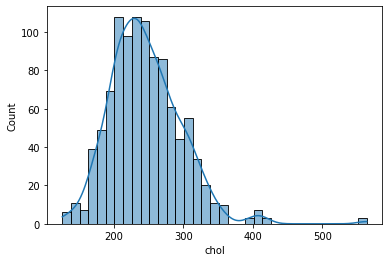

In [ ]:
sns.histplot(data=heart_df, x='chol', kde=True);

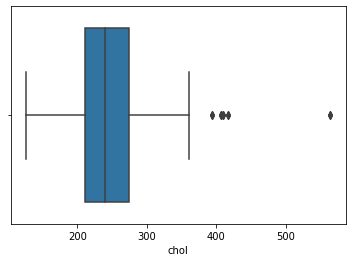

In [ ]:
sns.boxplot(data=heart_df, x='chol');

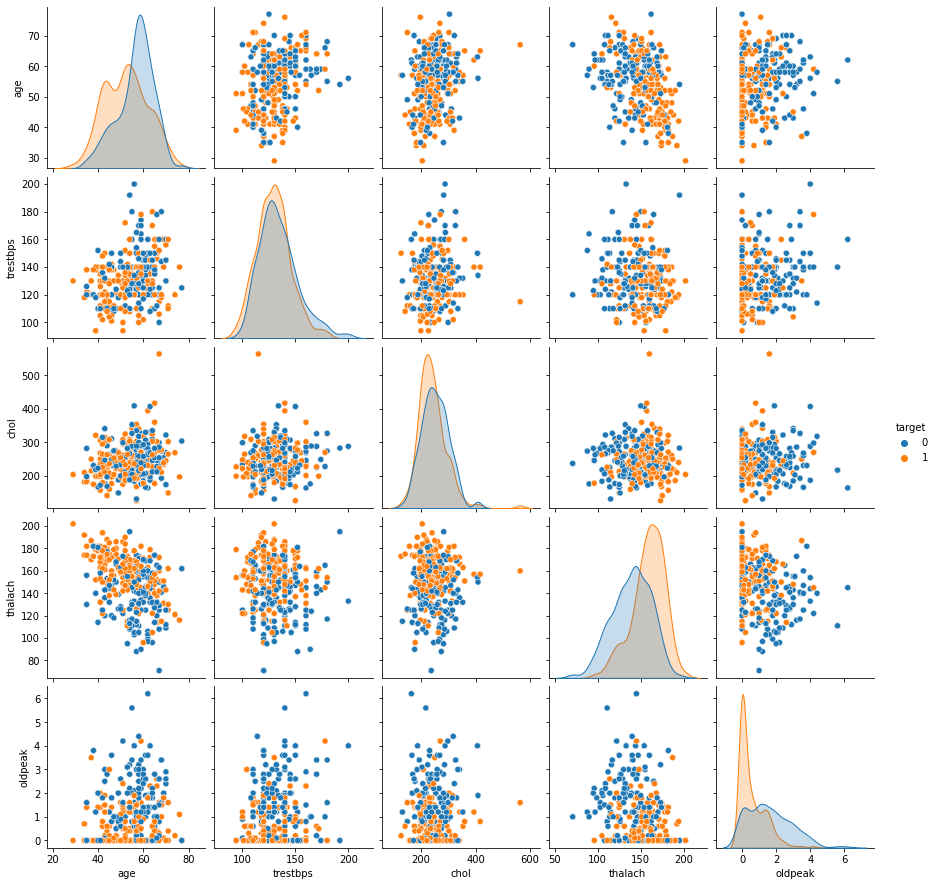

In [ ]:
cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
sns.pairplot(heart_df[cont_features + ['target']], hue='target');

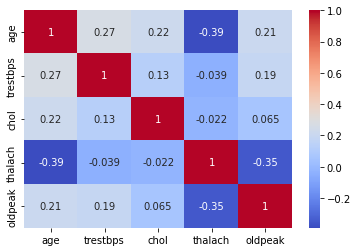

In [ ]:
sns.heatmap(heart_df[cont_features].corr(), annot=True, cmap='coolwarm');

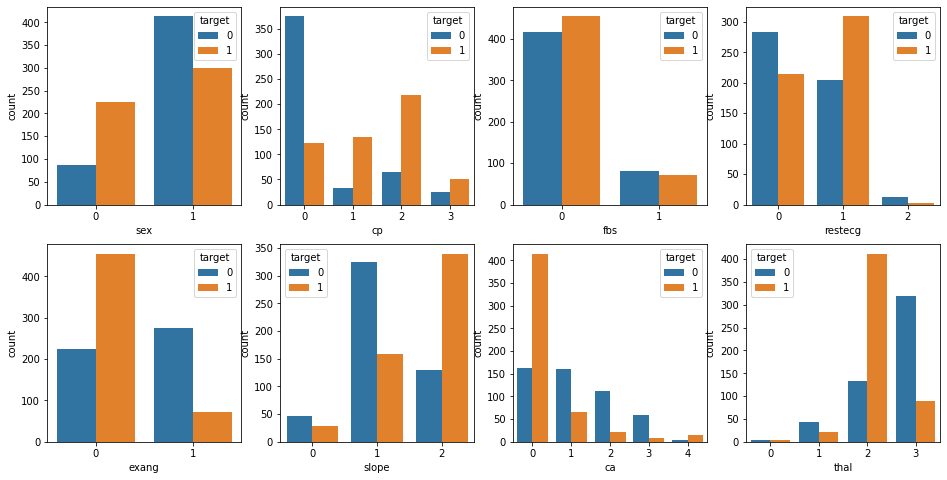

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for i, feature in enumerate(cat_features):
    ax = axs[int(i / 4), i%4]
    sns.countplot(data=heart_df[cat_features + ['target']], x=feature, hue='target', ax=ax)

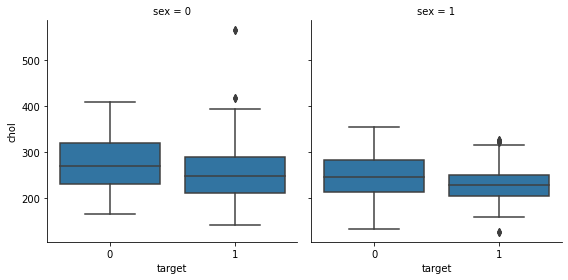

In [ ]:
g = sns.FacetGrid(heart_df, col='sex', height=4)
g.map_dataframe(sns.boxplot, x='target', y='chol');

# Sweetviz 
A common theme in machine learning is the automation of tedious tasks. The generation of plots and summary statistics is one such component of EDA that has been automated. [Sweetviz](https://pypi.org/project/sweetviz/) is an open-source Python library that helps generate visualizations for EDA with a single line of code. Note, while such automation tools are incredibly useful, often times more custom visualizations are necessary, which is where a tool like Seaborn comes in. Business requirements usually dictates the direction of EDA.

First, install Sweetviz using pip. 

In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 5.7 MB/s 


Import the Sweetviz library.

In [ ]:
import sweetviz as sv

## Checkup Exercise Set 2

**Exercise:** Run an `analyze` report using Sweetviz.

**Exercise:** In the generated report open the Associations tab. Which features are correlated to the `target` variable?

**Exercise:** What is the most frequent age in the dataset? Are there more males or females? What's the most frequent `cp` value? Based on feature correlation with the `target`, which feature(s) would be a good candiadate for exclusion in a machine learning model?

In [ ]:
analyze_report = sv.analyze(heart_df, target_feat='target')

                                             |          | [  0%]   00:00 -> (? left)


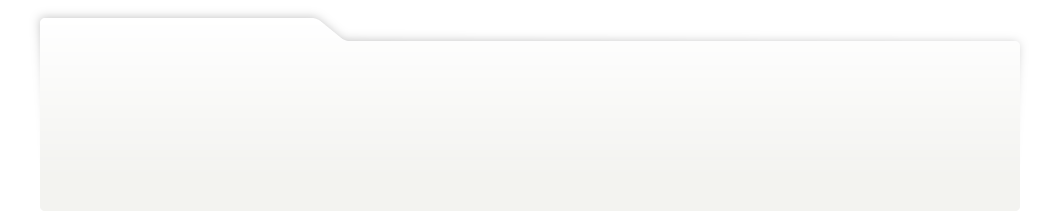
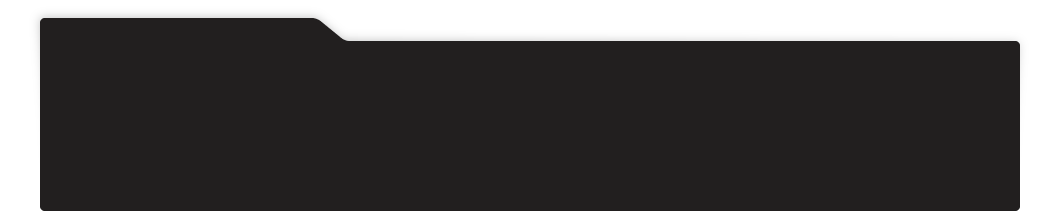
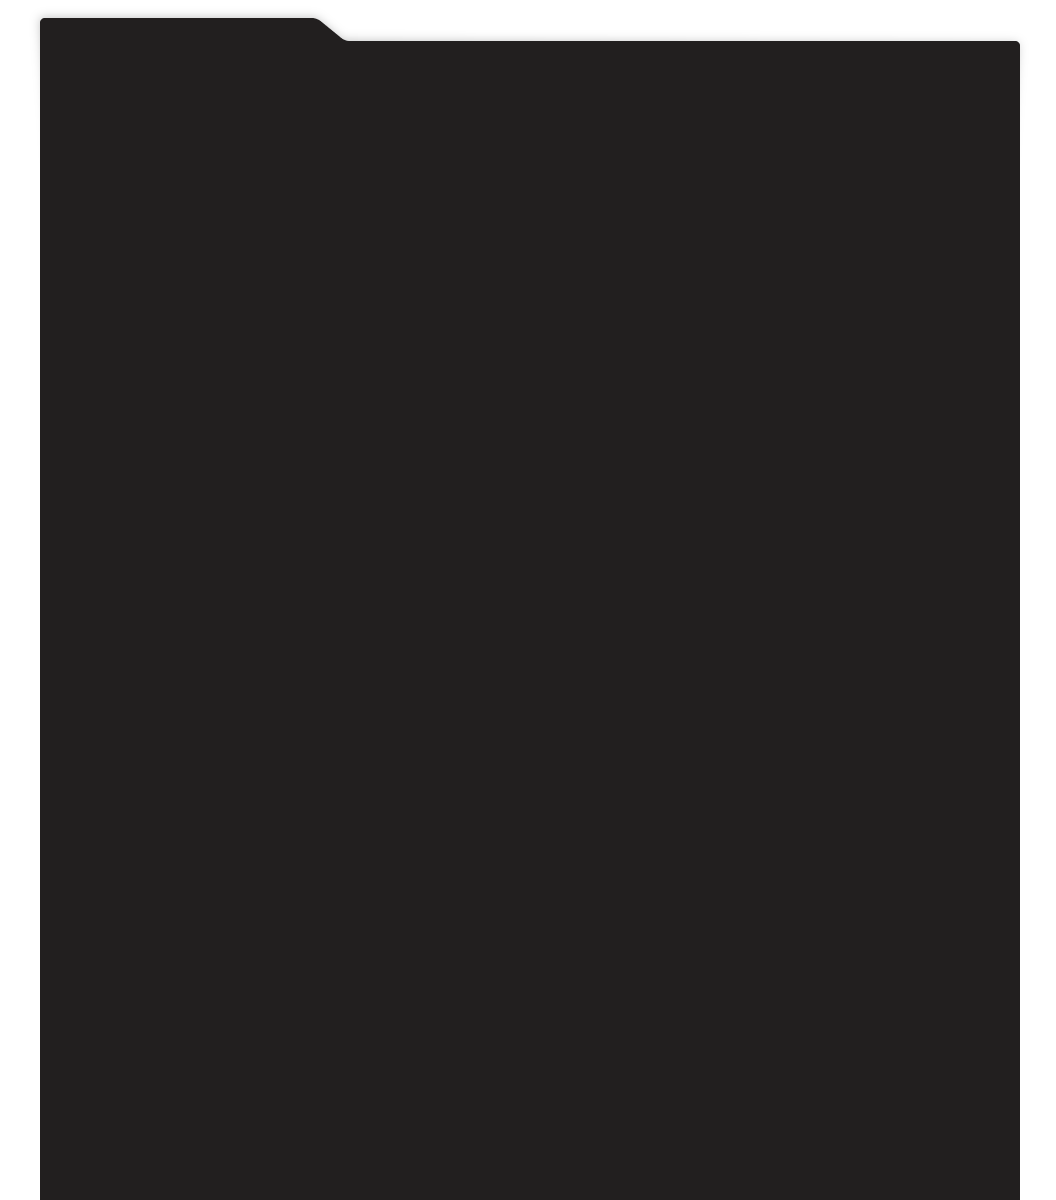
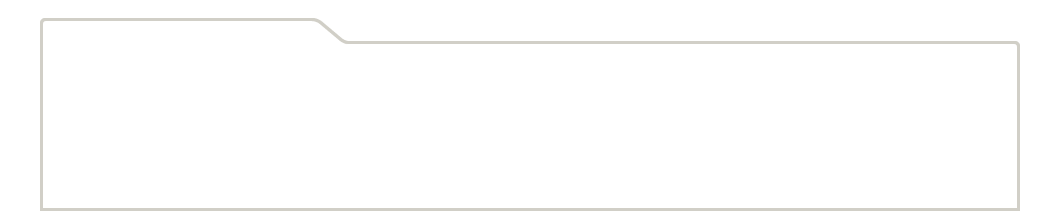
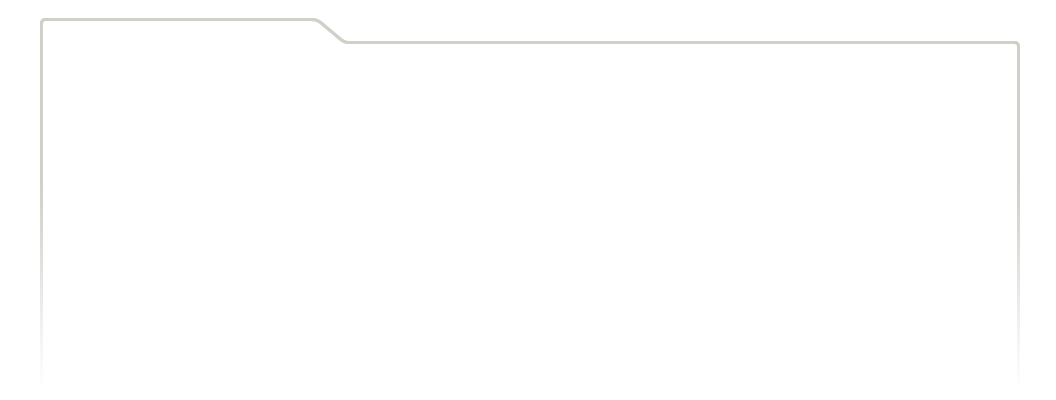
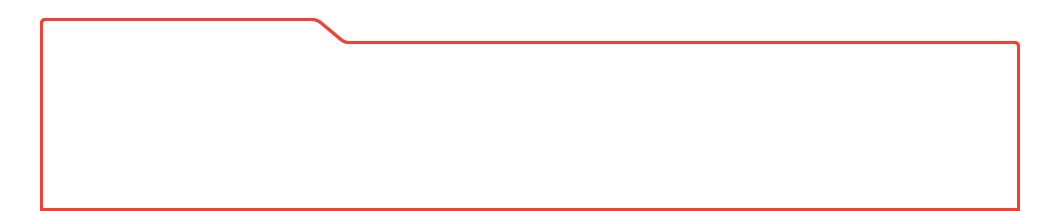
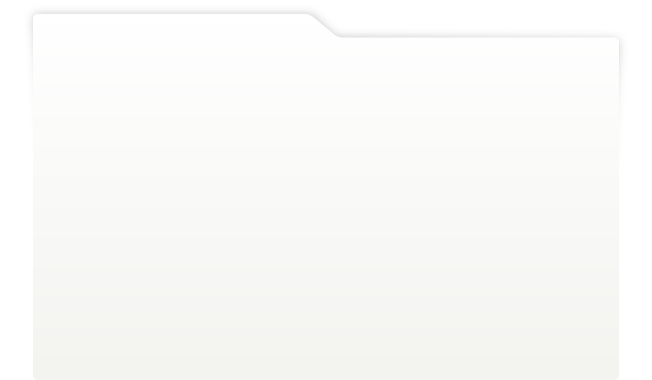
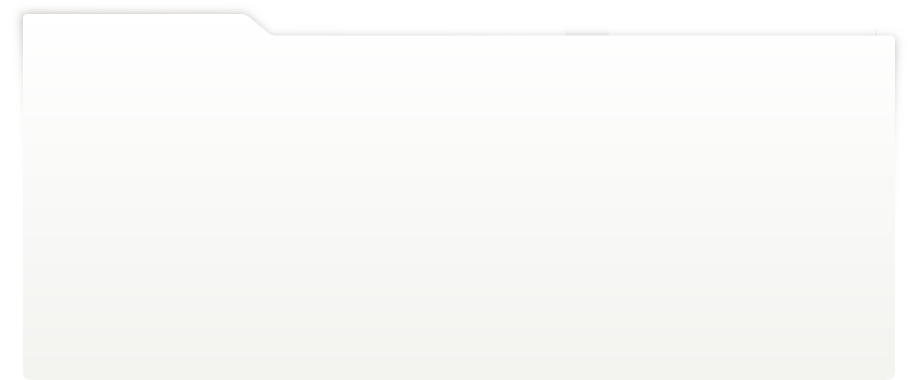
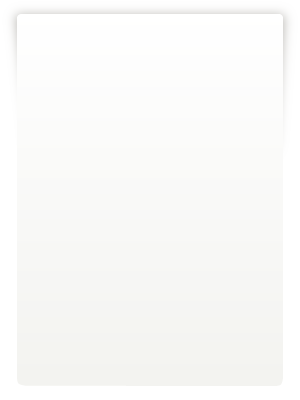
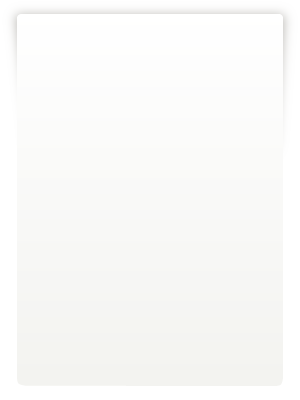
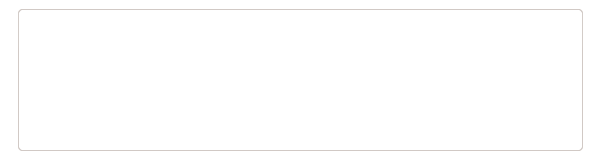
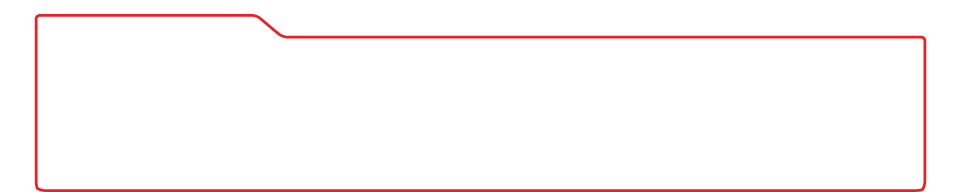
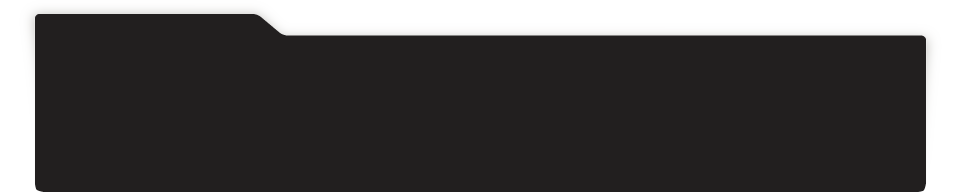
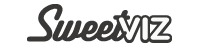
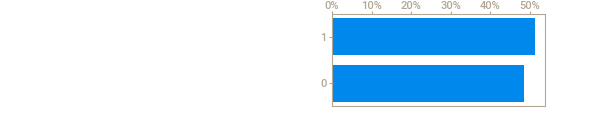
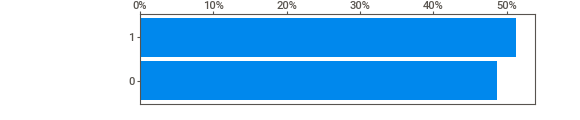
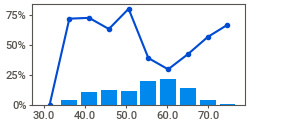
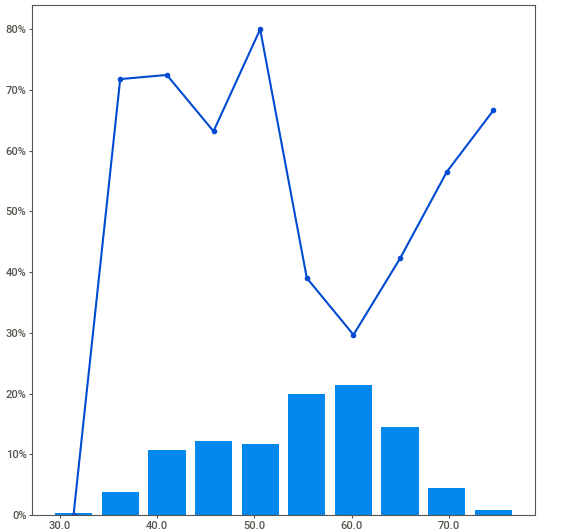
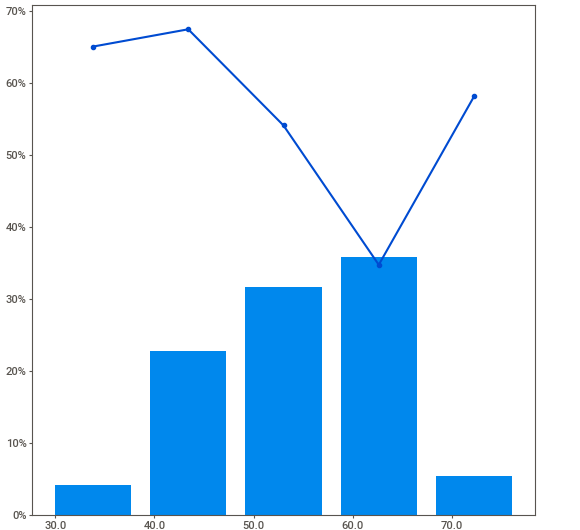
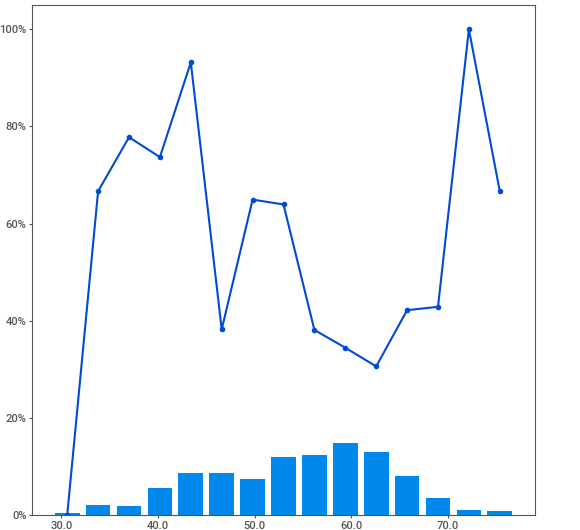
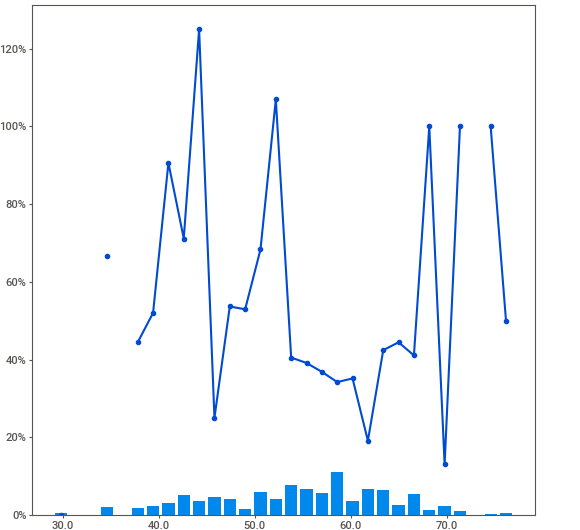
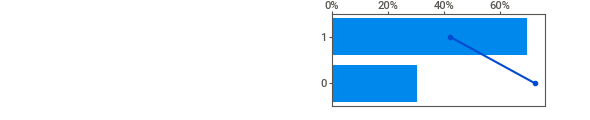
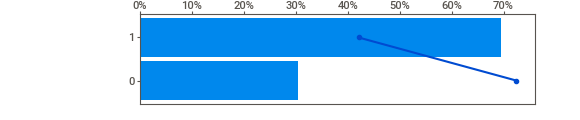
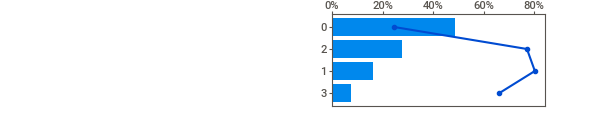
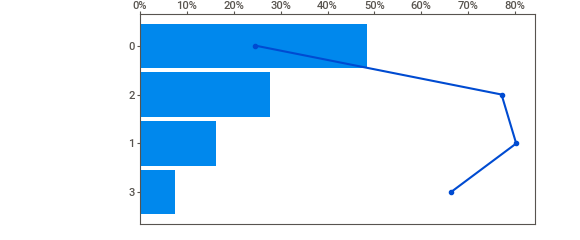
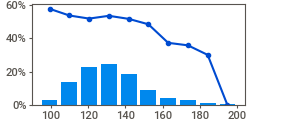
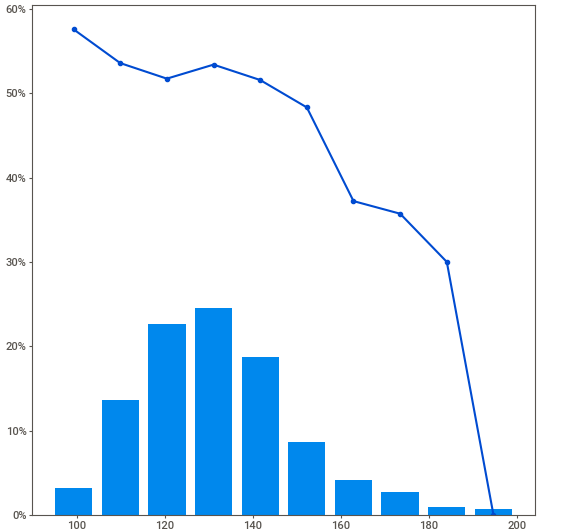
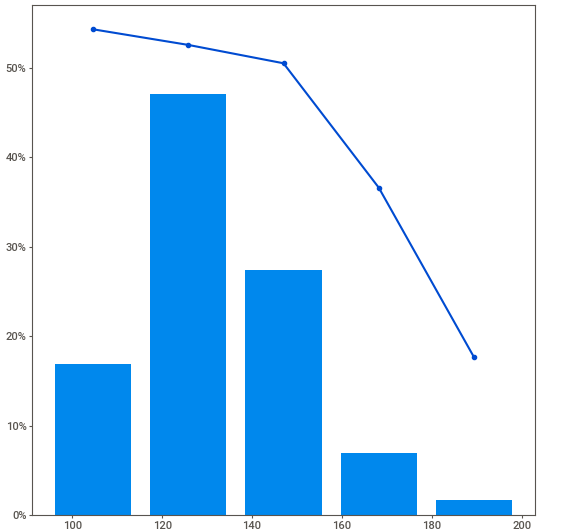
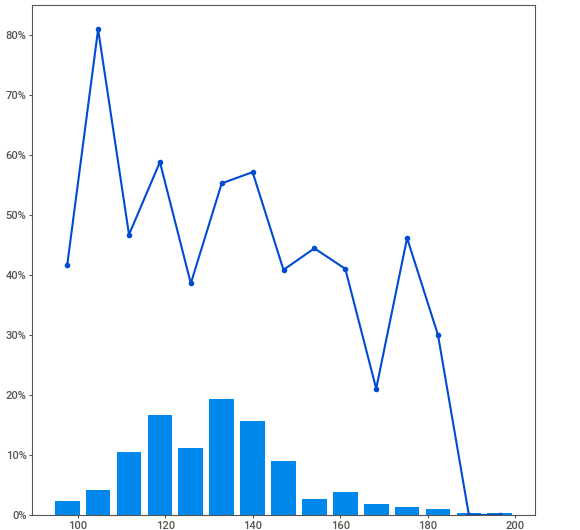
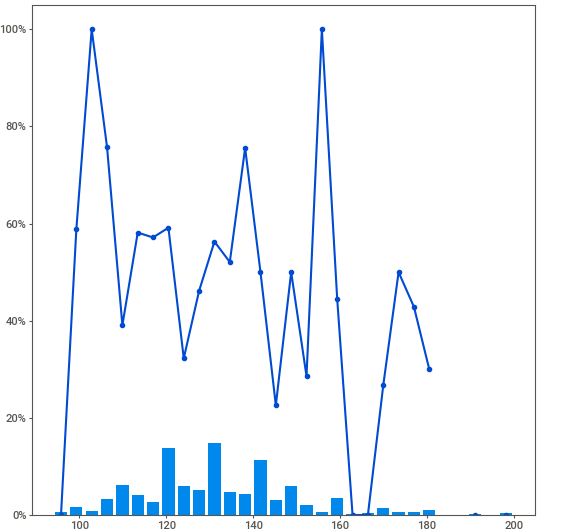
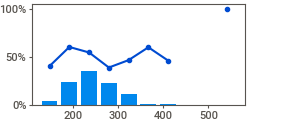
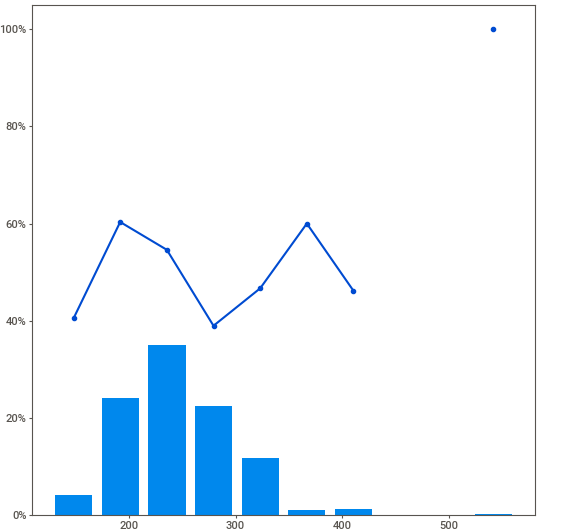
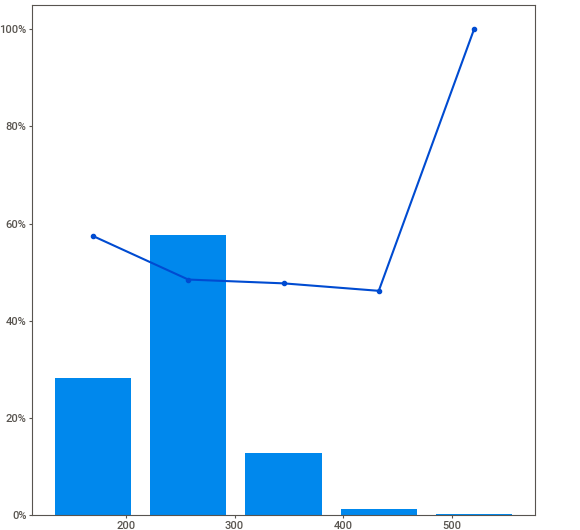
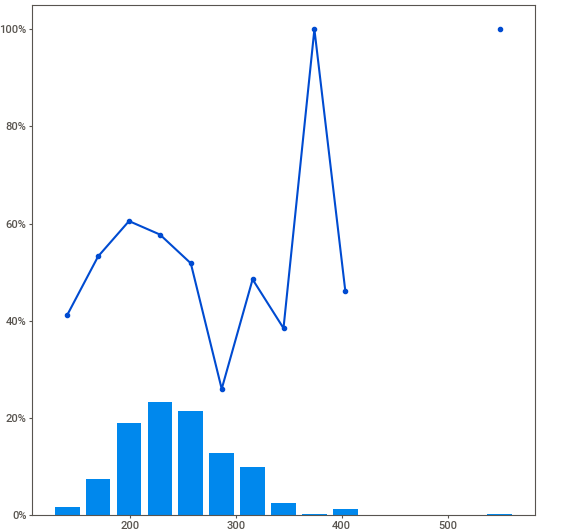
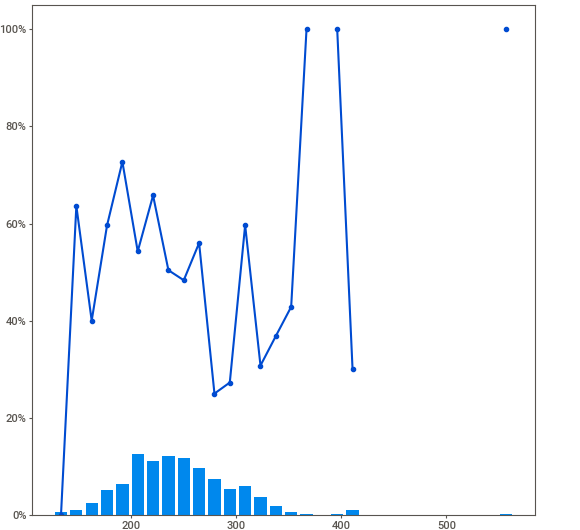
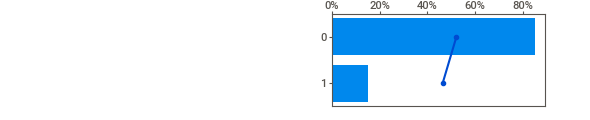
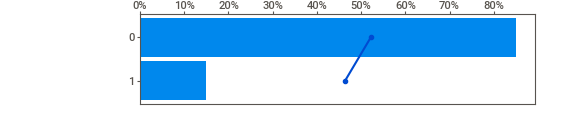
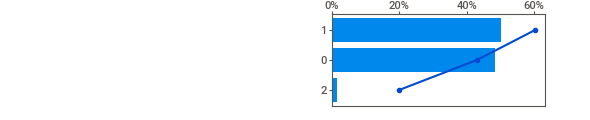
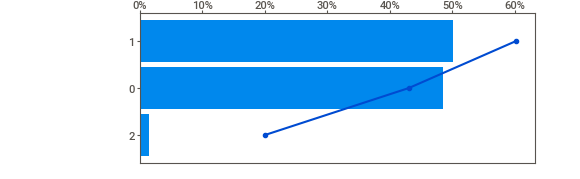
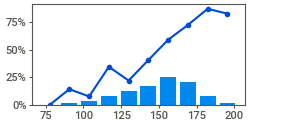
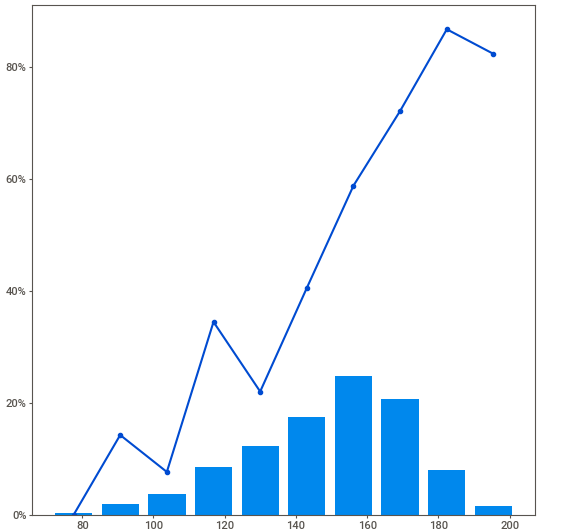
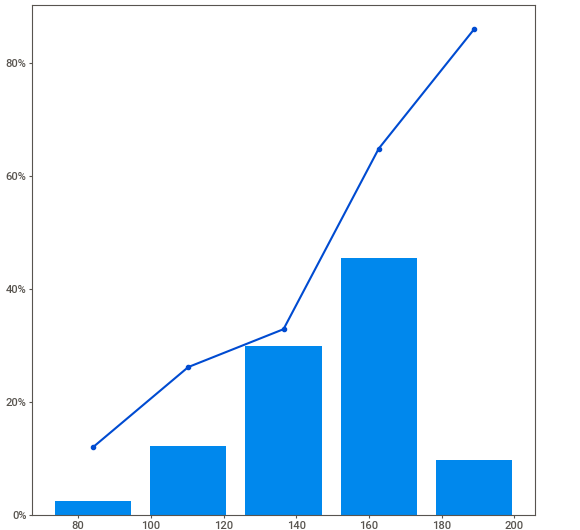
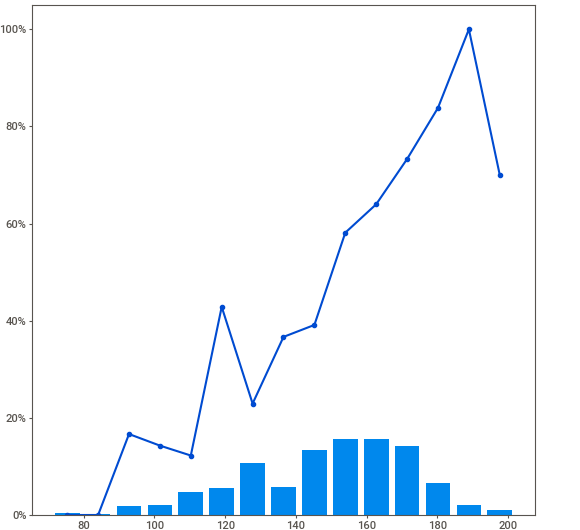
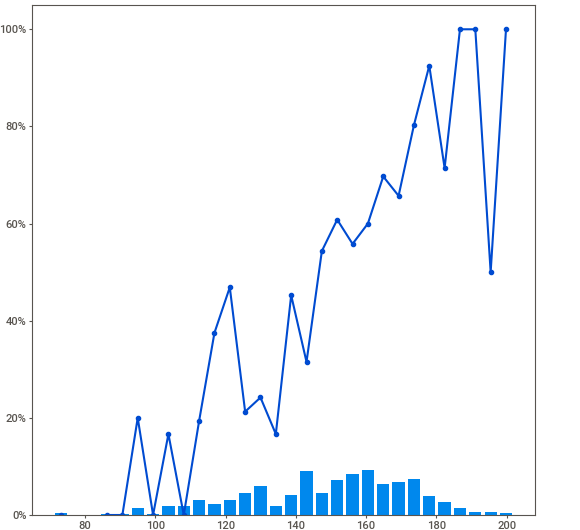
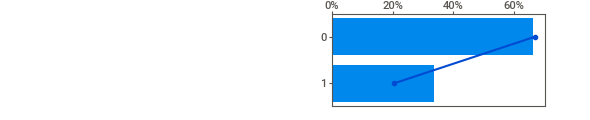
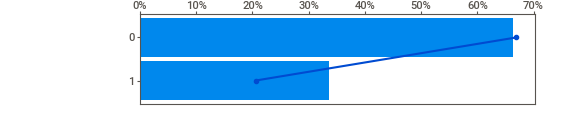
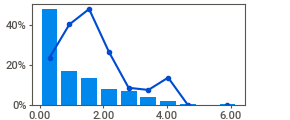
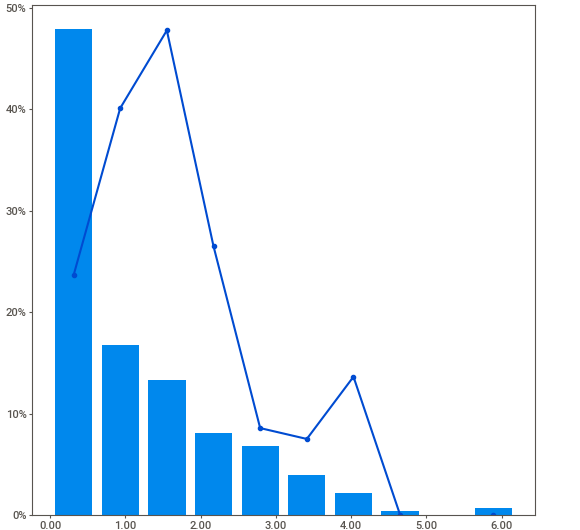
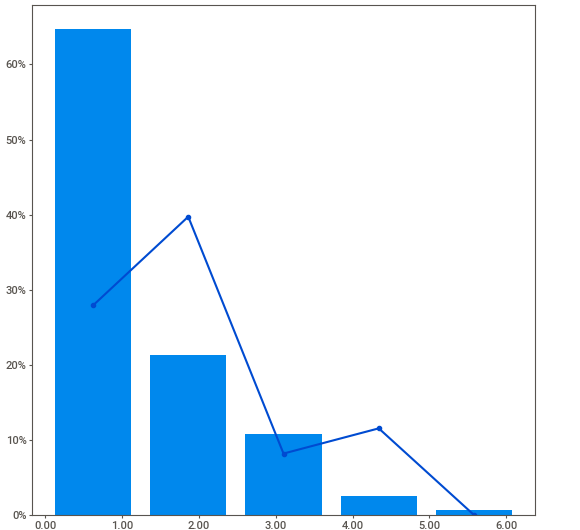
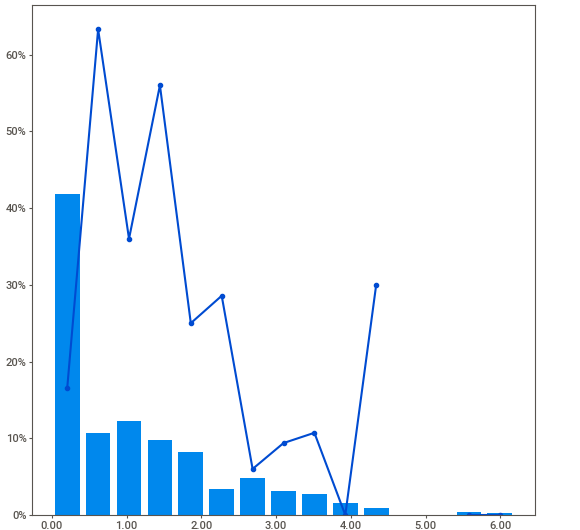
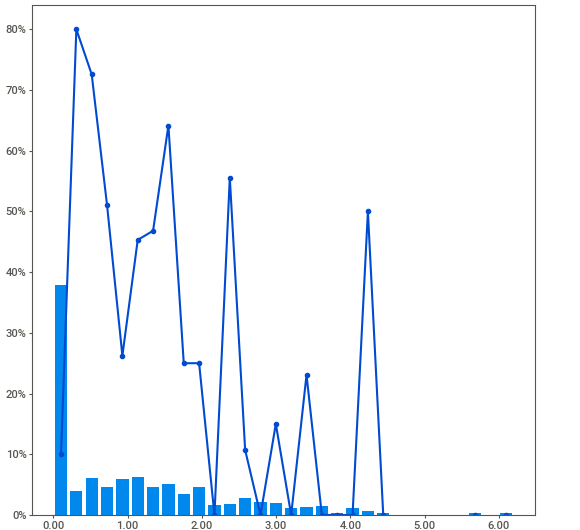
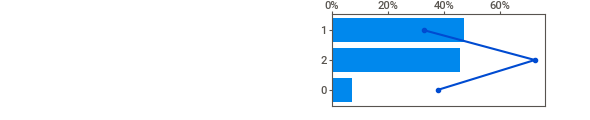
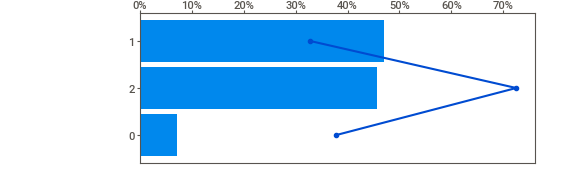
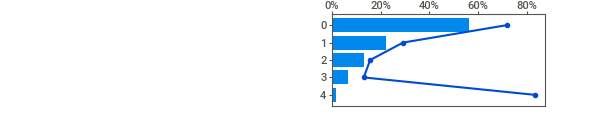
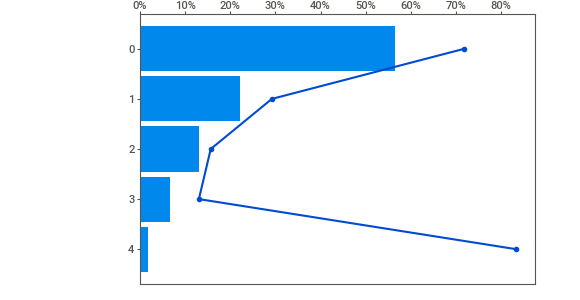
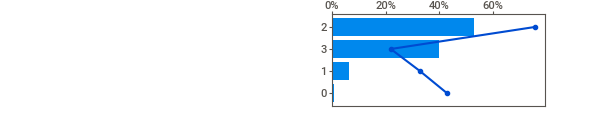
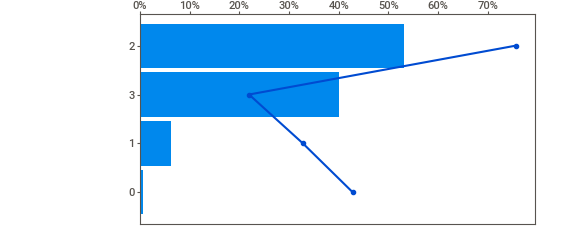
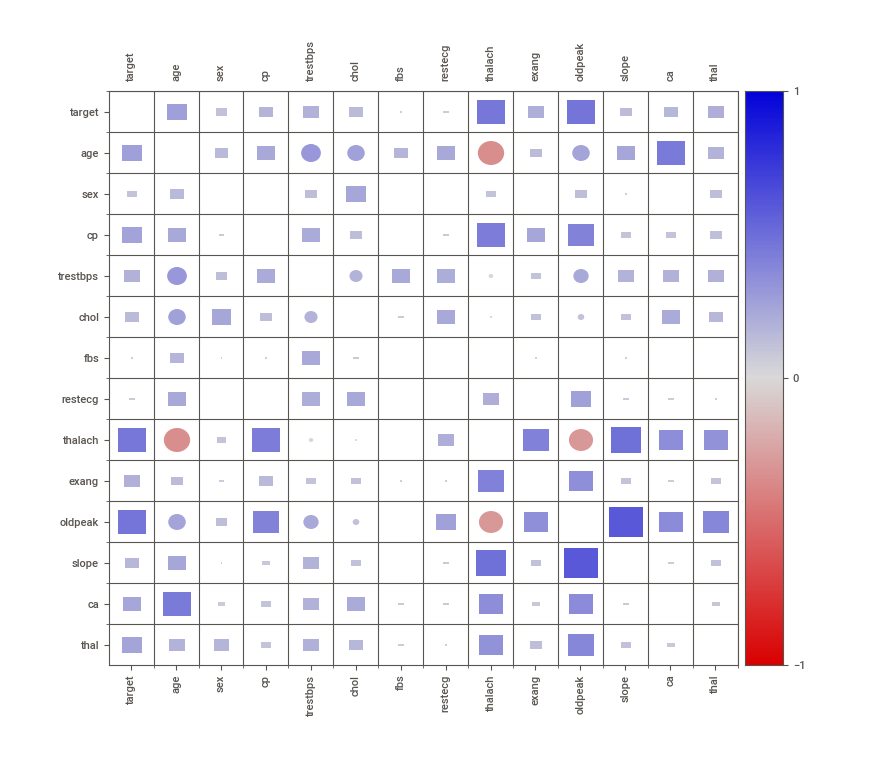
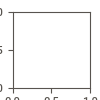

In [ ]:
analyze_report.show_notebook()

# Partitioning

Partitioning data into training and test sets is extraordinarily important in machine learning. The purpose of data partitioning, or splitting, is to avoid overfitting a machine learning model. In this case, a model fits the data on which it's trained well but then does not generalize to new data.

Often times, data is split into an additional segment as well, called the cross validation set. The purpose of the cross validation set is to choose the most performant hyperparameters for a model. Typically, the cross validation set is a subset of the training data. 

![](https://149695847.v2.pressablecdn.com/wp-content/uploads/2019/04/model.png) [Image Source](https://analyticsindiamag.com/how-to-build-a-fair-dataset-for-a-machine-learning-project/)

Import relevant libraries for data splitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import math

## Checkup Exercise Set 3

**Exercise:** The simplest, and most common, form of data splitting can be done using Scikit-Learn's `train_test_split` method. Apply `train_test_split` to generate training and test sets, with training data comprising 70% of the split. Make sure the split is reproducible by setting a `random_state`. Also, ensure the data is shuffled before splitting. Do any rows in the training and test sets share any of the same rows? Assert the shape of the training data is what you expect.

**Exercise:** K-fold splitting is a popular technique for relatively small datasets. An excellent discussion comparing K-fold and holdout sets can be found [here](https://www.kdnuggets.com/2017/08/dataiku-predictive-model-holdout-cross-validation.html). Use Scikit-Learn's `StratifiedKFold` to create 5 folds of the data. Make sure to set `random_state` so your work is reproducible. After splitting into 5 folds, loop through each fold and calculate the size of the train and test sets, and calculate the ratios of `target` in each set. Are the values what you expect?

**Exercise:** The Sweetviz library has a comparison tool that allows one to compare two different datasets. Often, it's useful to compare training and test data distributions to ensure they're coming from the same population. Use Sweetviz's `compare` function to do a comparison between the train and test sets you generated using `train_test_split`. Do the train and test data sets have roughly the same distributions for each feature?

In [ ]:
heart_df_train, heart_df_test = train_test_split(heart_df, random_state=42, test_size=.3)

In [ ]:
heart_df_train.shape[0] == math.floor(heart_df.shape[0] * .7)

True

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_ix, test_ix in skf.split(heart_df.drop('target', axis=1), heart_df['target']):
  pct_pos_in_train = heart_df['target'].iloc[train_ix].mean()
  pct_pos_in_test = heart_df['target'].iloc[test_ix].mean()
  print('Train size: {0}, Test size: {1}, Ratio Pos Train: {2}, Ratio Pos Test: {3}'.format(
      train_ix.shape[0], 
      test_ix.shape[0],
      pct_pos_in_train,
      pct_pos_in_test
    )
  )

Train size: 820, Test size: 205, Ratio Pos Train: 0.5134146341463415, Ratio Pos Test: 0.5121951219512195
Train size: 820, Test size: 205, Ratio Pos Train: 0.5134146341463415, Ratio Pos Test: 0.5121951219512195
Train size: 820, Test size: 205, Ratio Pos Train: 0.5134146341463415, Ratio Pos Test: 0.5121951219512195
Train size: 820, Test size: 205, Ratio Pos Train: 0.5134146341463415, Ratio Pos Test: 0.5121951219512195
Train size: 820, Test size: 205, Ratio Pos Train: 0.5121951219512195, Ratio Pos Test: 0.5170731707317073


In [ ]:
comparison_report = sv.compare(
    [heart_df_train, 'Train'], 
    [heart_df_test, 'Test'], 
    target_feat = 'target'
)

                                             |          | [  0%]   00:00 -> (? left)


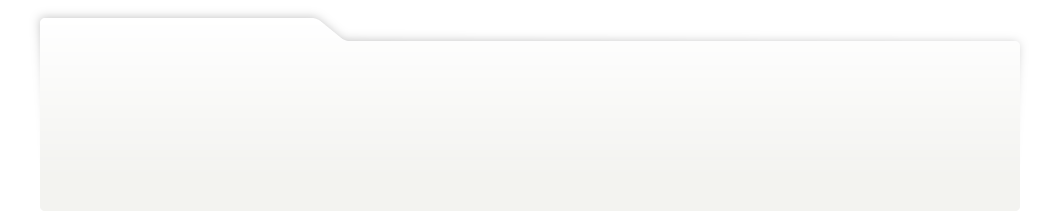
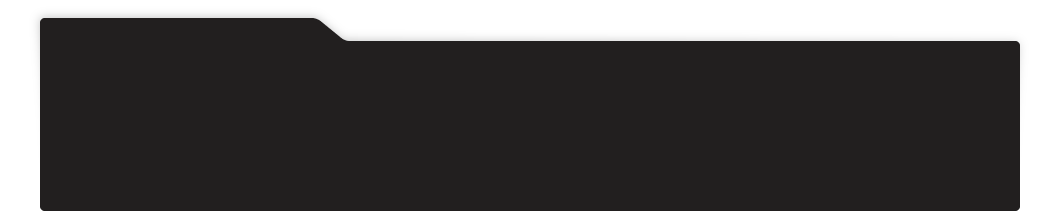
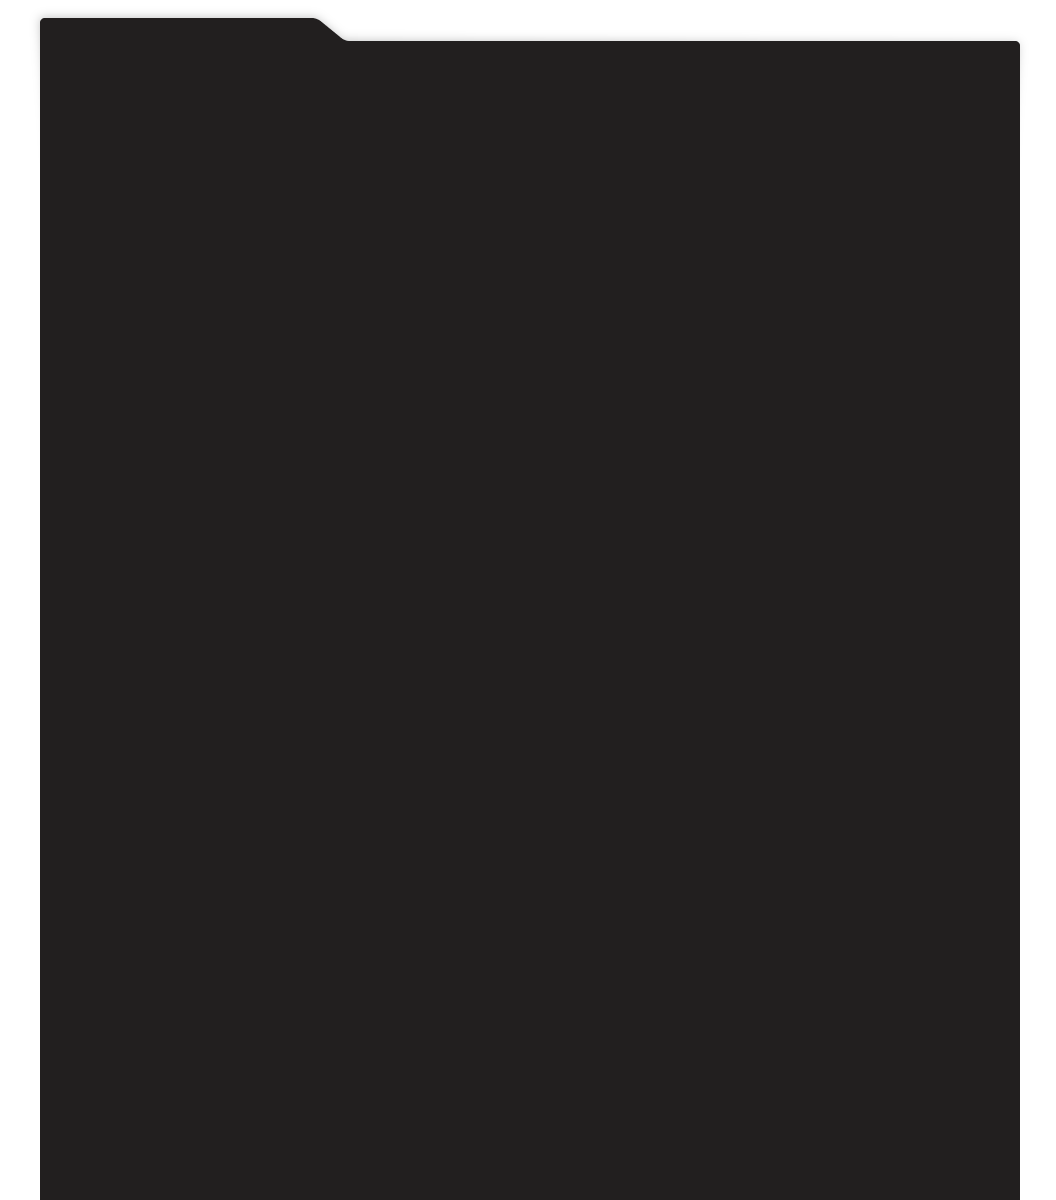
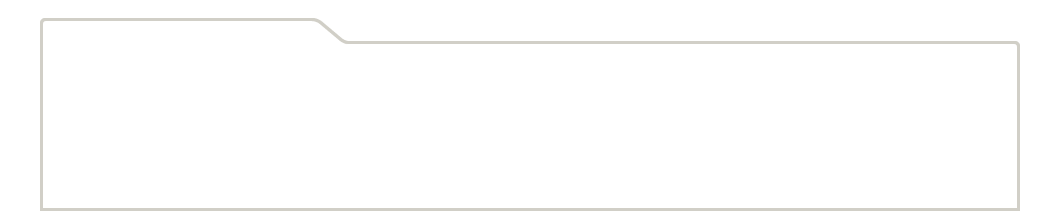
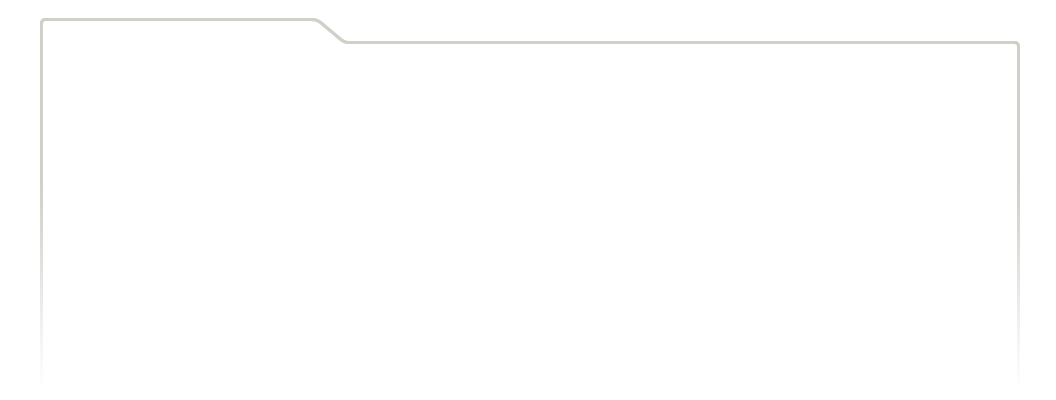
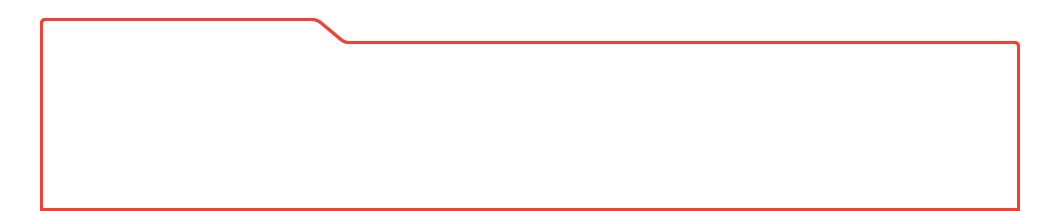
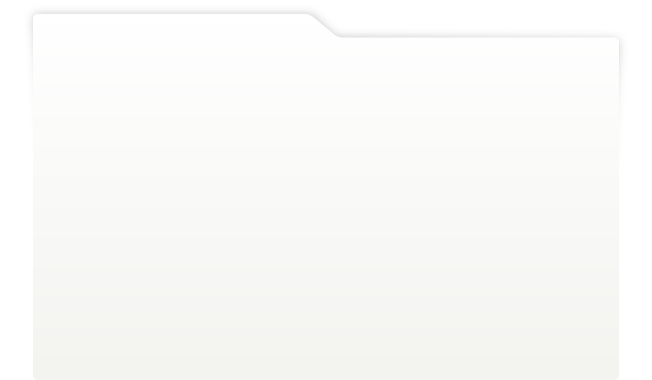
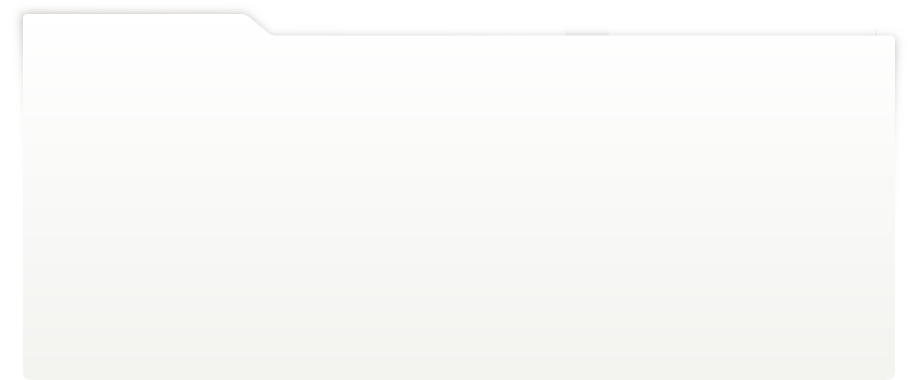
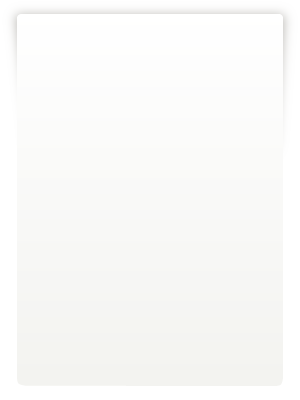
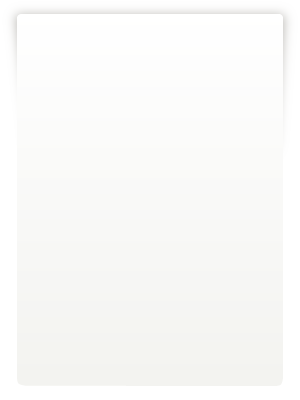
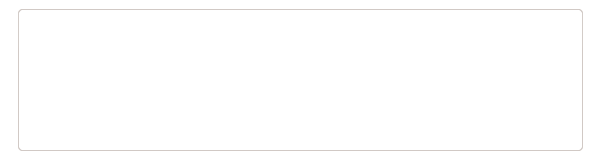
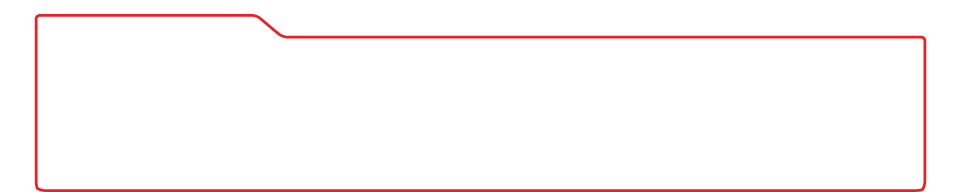
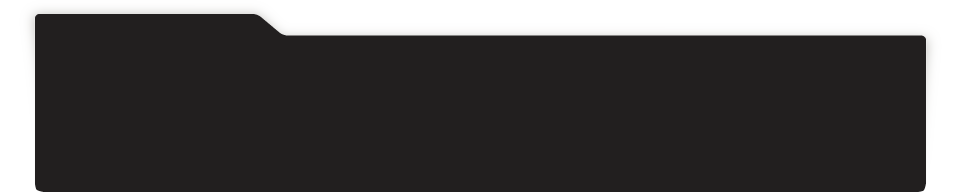
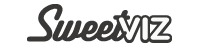
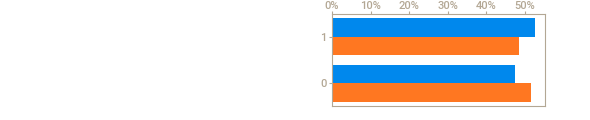
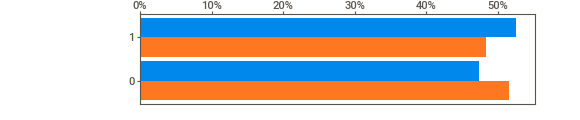
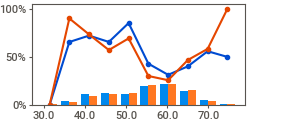
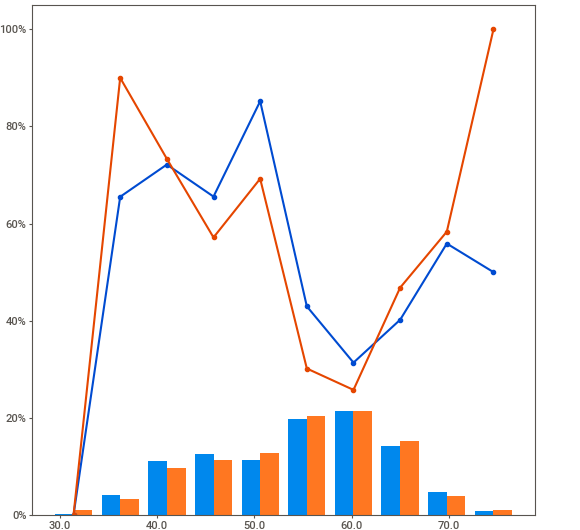
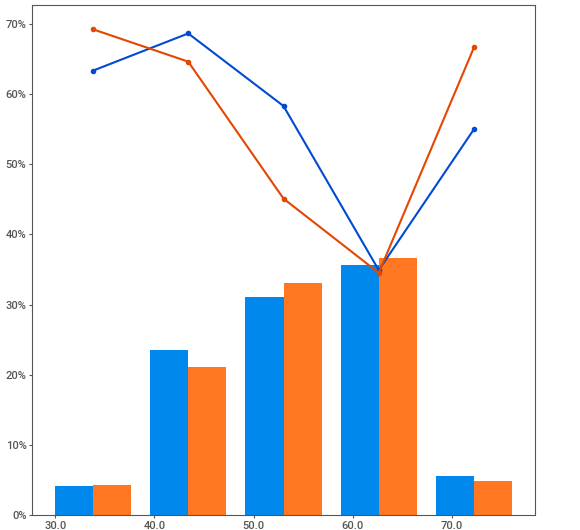
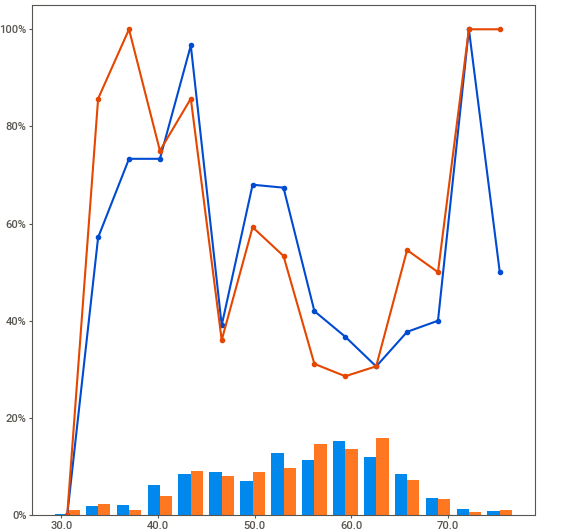
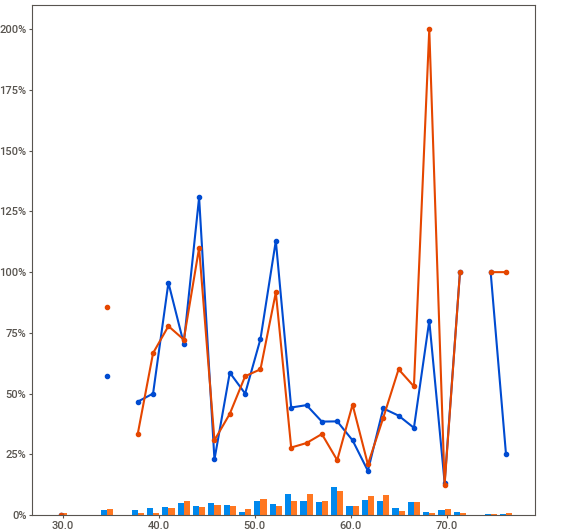
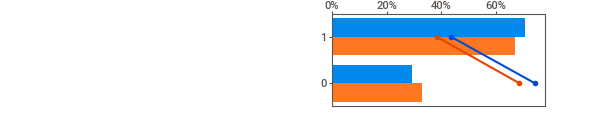
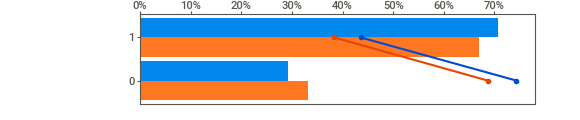
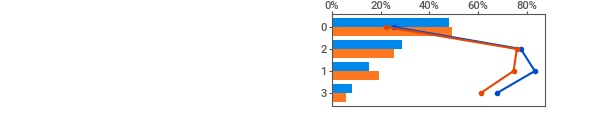
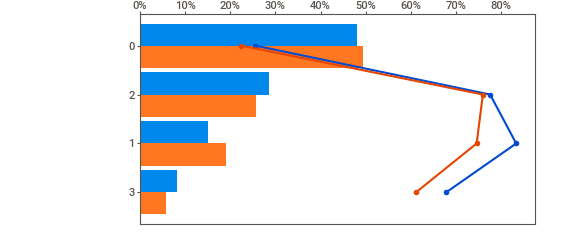
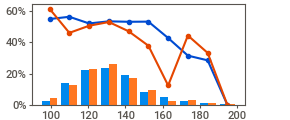
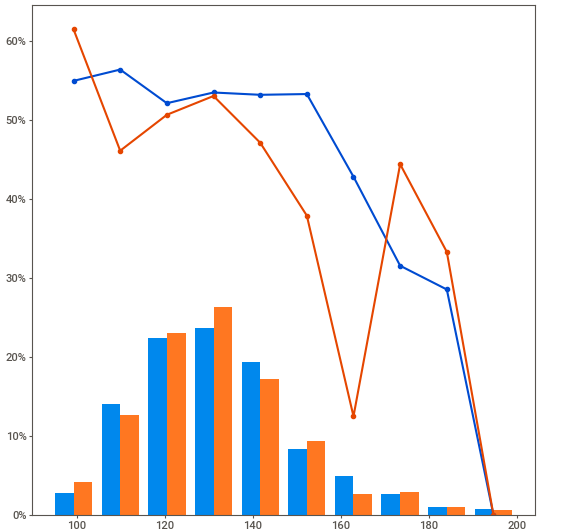
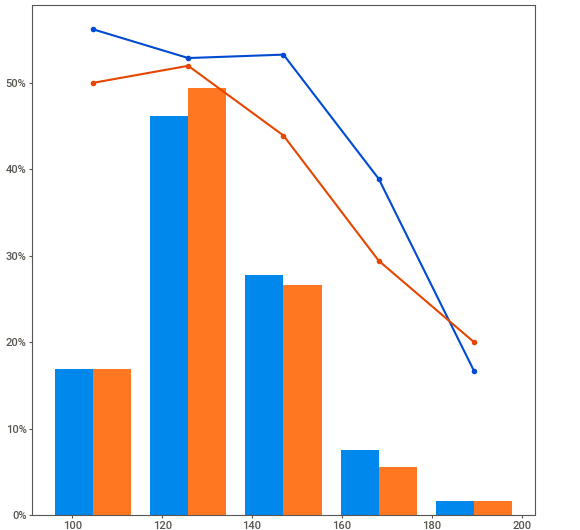
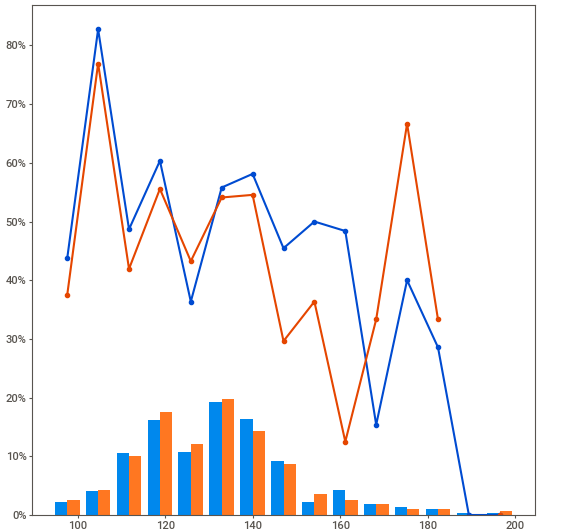
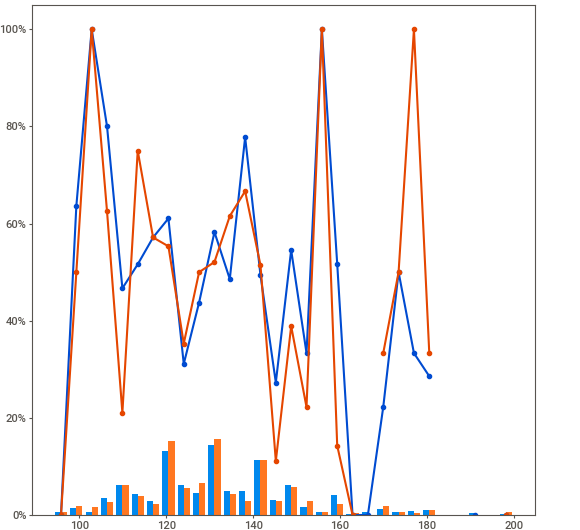
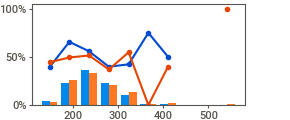
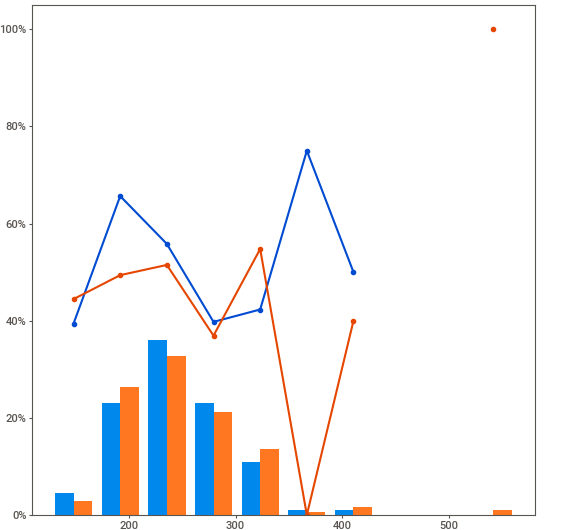
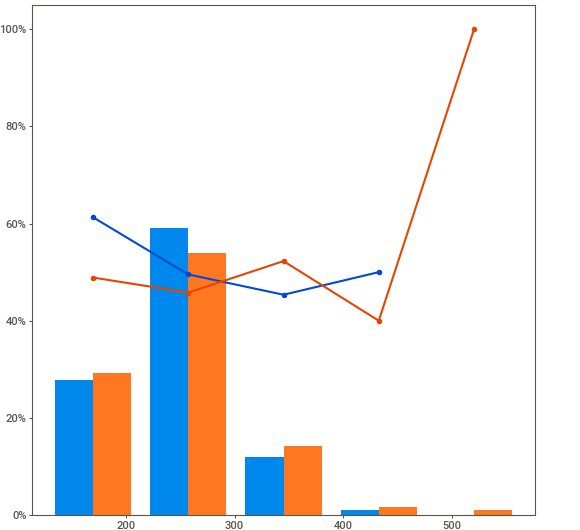
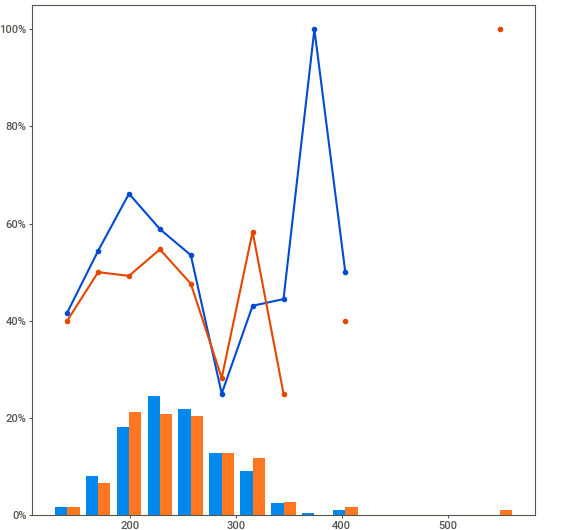
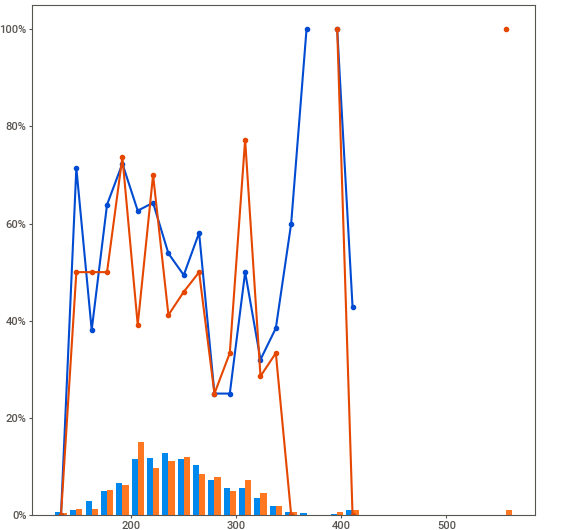
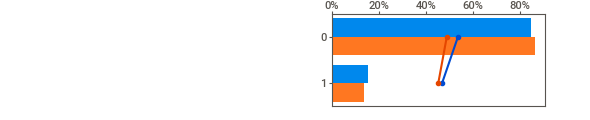
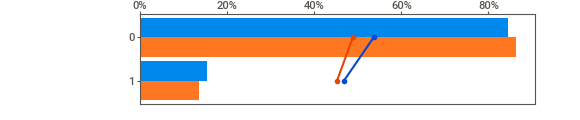
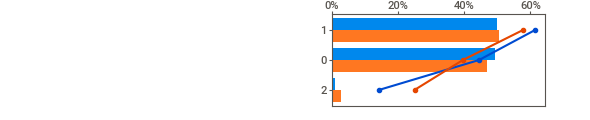
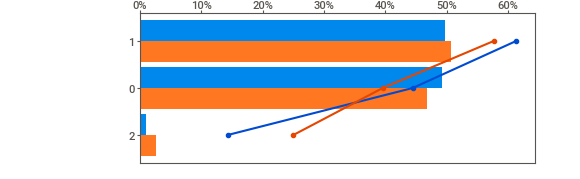
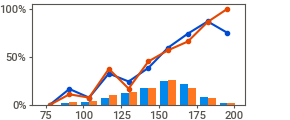
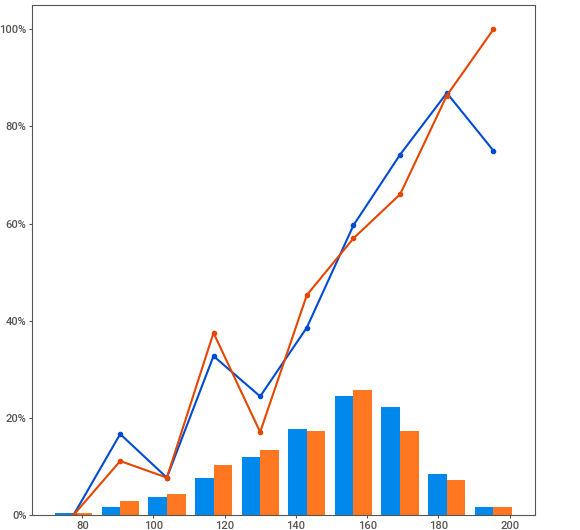
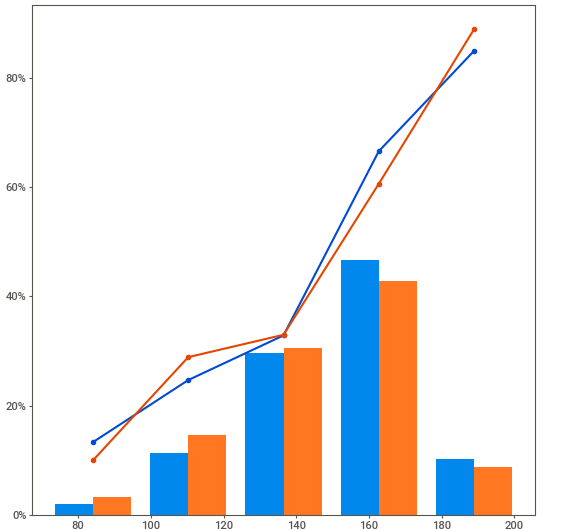
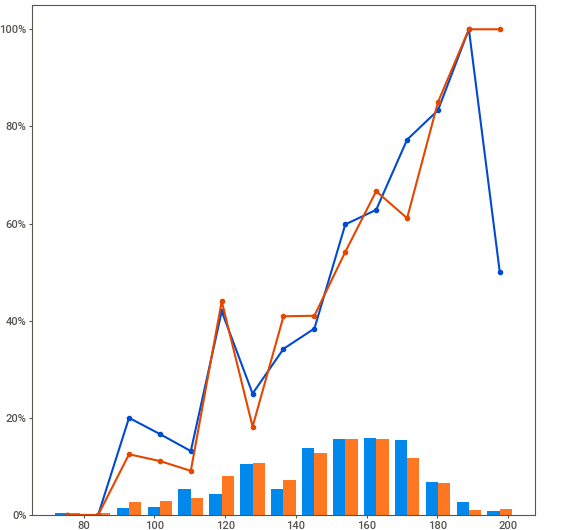
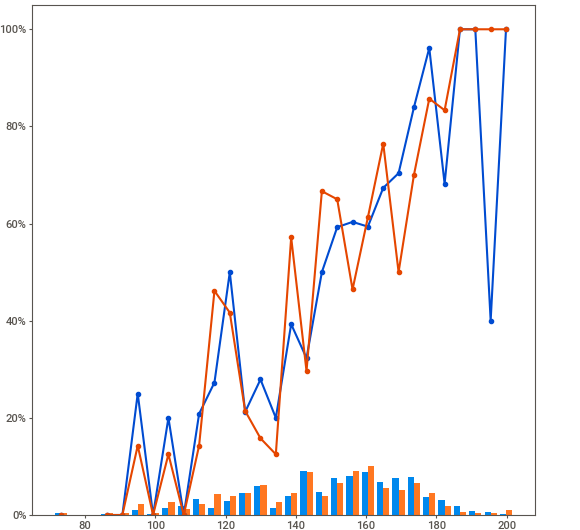
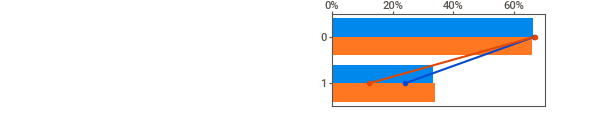
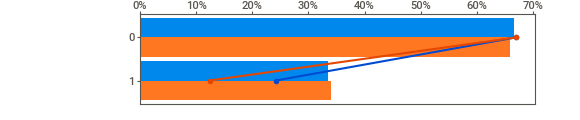
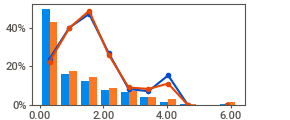
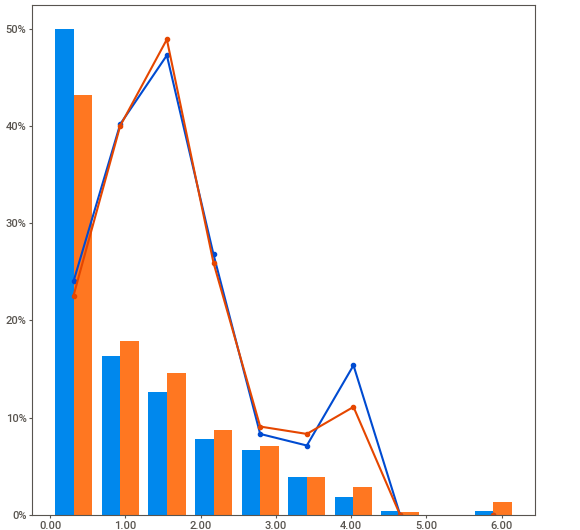
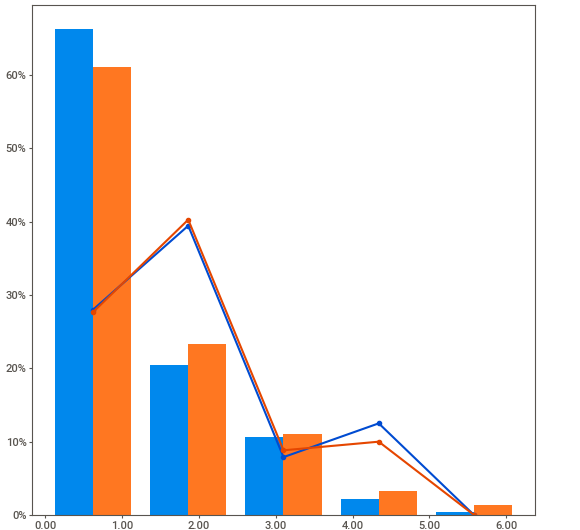
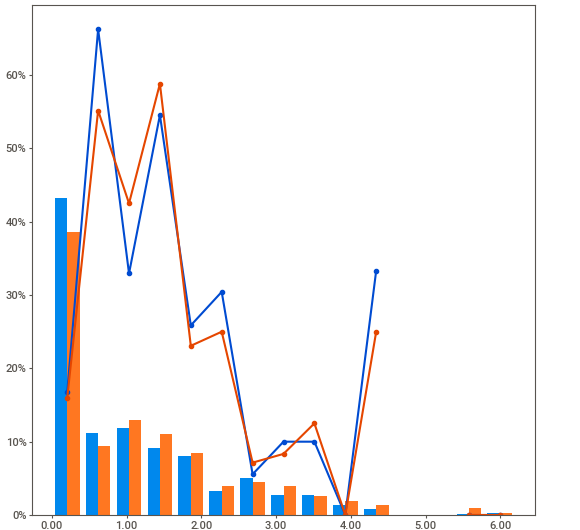
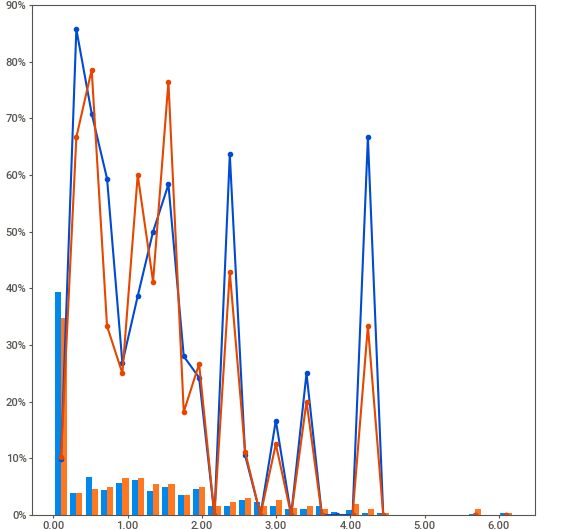
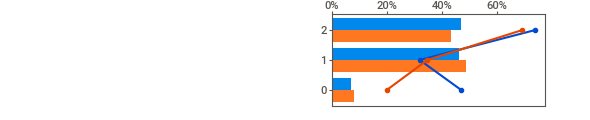
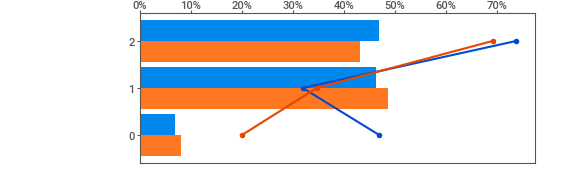
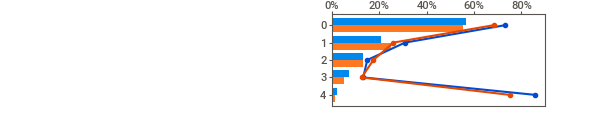
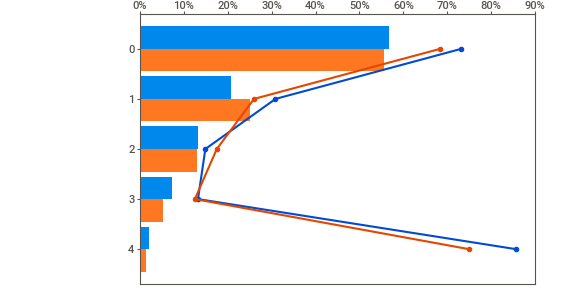
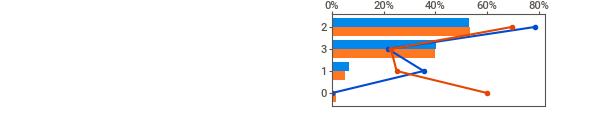
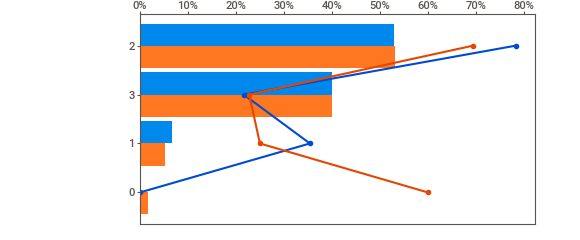
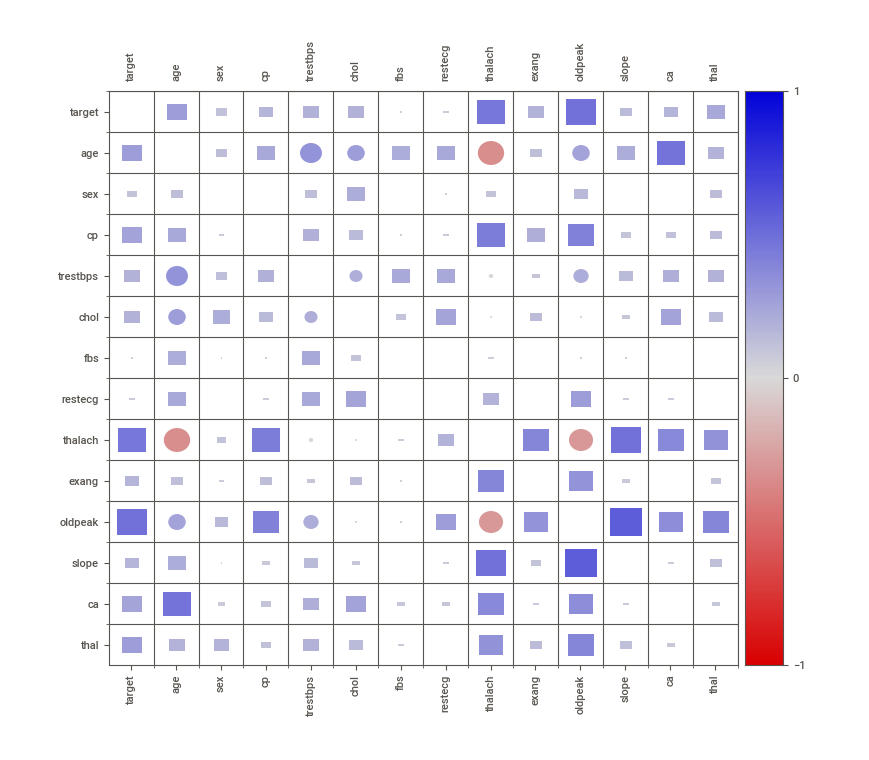
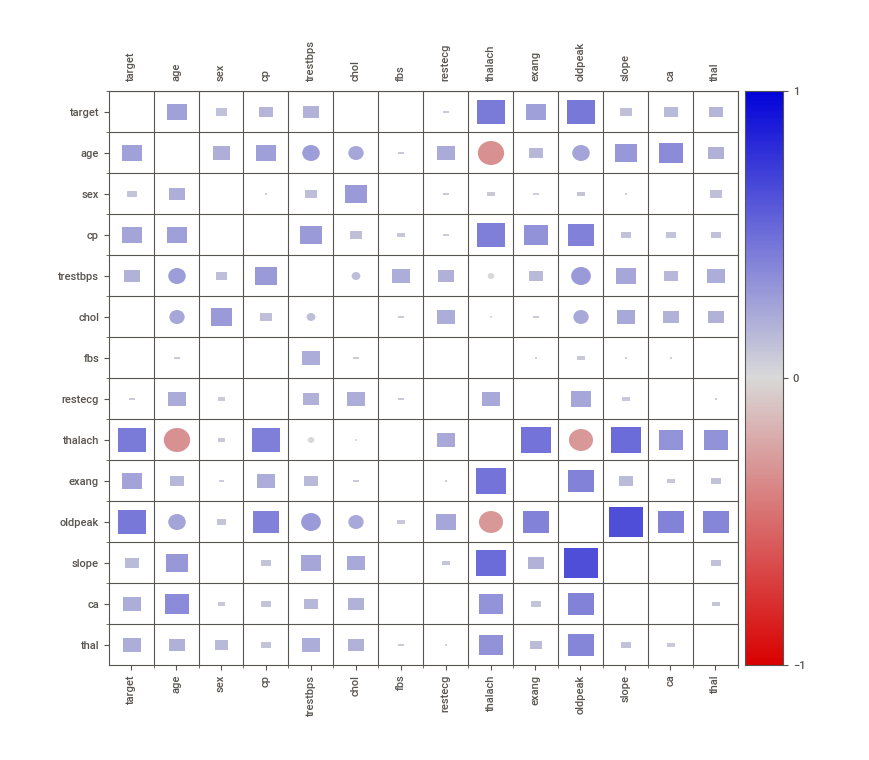

In [ ]:
comparison_report.show_notebook() 